<a href="https://colab.research.google.com/github/Seng-Pan/testingforSimboloAI/blob/main/Cats_vs_Dogs_vs_Tigers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Necessary Libraries

import os
import numpy as np
import tensorflow as tf
from google.colab import drive

In [3]:
# Check whether GPU exist or not ; Note => just do it if you need

# device_name = tf.test.gpu_device_name()

# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')

# print('Found GPU at: {}'.format(device_name))

### 2. Data Understanding

In [5]:
# connect with google dirve

drive.mount('/content/drive')   # .mount => where u want to insert that drive

Mounted at /content/drive


In [6]:
train_dir = "/content/drive/MyDrive/Deep Learning/Dogs vs Cats vs Tiger/train"
test_dir = "/content/drive/MyDrive/Deep Learning/Dogs vs Cats vs Tiger/test"

In [8]:
os.listdir(train_dir+"/Dogs")

['dog2.jpg', 'dog3.jpg', 'dog5.jpg', 'dog4.jpg', 'dog1.jpg']

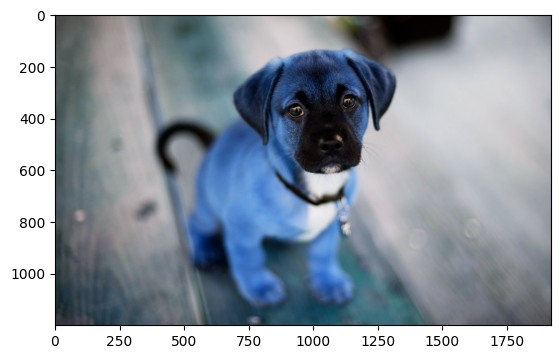

In [9]:
import cv2
image = cv2.imread(train_dir+"/Dogs/dog1.jpg")

import matplotlib.pyplot as plt
plt.imshow(image)   # => result is more blue due to blue,green,red reading

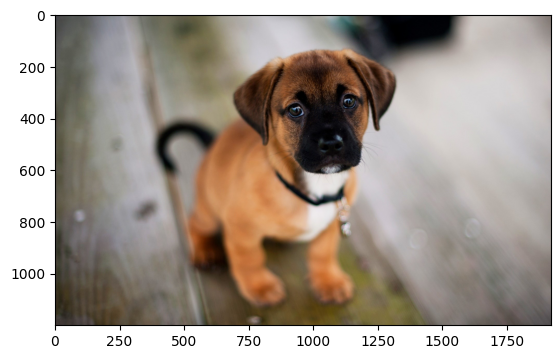

In [10]:
# change BGR to RGB

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

### 3. Data Preprocessing

In [11]:
# All image will be rescaled by 1/255
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create objects for datagen
datagen_train = ImageDataGenerator(rescale = 1.0/255.0)
datagen_test = ImageDataGenerator(rescale = 1.0/255.0)

In [38]:
batch_size = 5

train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size = (200,200),
                                              # color_mode = "grayscale"
                                              batch_size=batch_size,
                # if more than 2 categories : categorical, if 2 : binary
                                              class_mode = "categorical",
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(test_dir,
                                              target_size = (200,200),
                                              # color_mode = "grayscale"
                                              batch_size=batch_size,
                  # if more than 2 categories : categorical, if 2 : binary
                                              class_mode = "categorical",
                                              shuffle = True)

Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 4. Modeling

In [39]:
# construct neral network model

# less accuracy with this model
# model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(100,100,3)),  # flatten -> change matrix table into one row, 3 = R, G, B (3 channels)
    # tf.keras.layers.Dense(500, activation=tf.nn.relu),   # put hidden layer be 100 neurons
    # tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    # tf.keras.layers.Dense(3, activation=tf.nn.softmax)  # output layers with 3 labels (neurons)
# ])

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),   # put hidden layer be 100 neurons
    tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)  # output layers with 3 labels (neurons)
])

In [40]:
# finalize to run this model

model.compile(optimizer = 'adam', # to get better reult
              loss = 'categorical_crossentropy',
              metrics = ['acc'])   # accuracy

In [41]:
# Data Training

num_of_training_images = 15
history = model.fit(train_set,
                    # steps_per_epoch = num_of_training_images//batch_size,  # no. of steps in each epoch
                    epochs = 10,
                    verbose = 2,
                    shuffle = False)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 - 5s - 2s/step - acc: 0.0667 - loss: 11.6147
Epoch 2/10
3/3 - 7s - 2s/step - acc: 0.2667 - loss: 3.7375
Epoch 3/10
3/3 - 8s - 3s/step - acc: 0.2000 - loss: 1.5977
Epoch 4/10
3/3 - 4s - 1s/step - acc: 0.4667 - loss: 1.0084
Epoch 5/10
3/3 - 5s - 2s/step - acc: 0.8000 - loss: 0.6115
Epoch 6/10
3/3 - 3s - 1s/step - acc: 0.8000 - loss: 0.5273
Epoch 7/10
3/3 - 5s - 2s/step - acc: 1.0000 - loss: 0.2494
Epoch 8/10
3/3 - 5s - 2s/step - acc: 1.0000 - loss: 0.1064
Epoch 9/10
3/3 - 5s - 2s/step - acc: 1.0000 - loss: 0.0455
Epoch 10/10
3/3 - 4s - 1s/step - acc: 1.0000 - loss: 0.0104


### Evaluation

In [42]:
# Class Labels

class_dictionary = test_set.class_indices
print('Labels dictionary', class_dictionary)

Labels dictionary {'Cats': 0, 'Dogs': 1, 'Tigers': 2}


In [43]:
# do testing that model

y_predicted = model.predict(test_set) # a way to predict

y_pred = []

for i in y_predicted:
  print(i)
  print(np.argmax(i))
  print()
  y_pred.append(np.argmax(i))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step
[0.81659704 0.16852403 0.01487898]
0

[0.41969022 0.55790234 0.0224074 ]
1

[0.89430845 0.09934678 0.00634482]
0

[0.78766716 0.19568436 0.01664846]
0

[0.93999213 0.04512437 0.01488347]
0

[0.33550245 0.61113197 0.05336552]
1

[0.2487179  0.67799866 0.07328348]
1

[0.27168176 0.71368337 0.01463488]
1

[0.90010476 0.09198506 0.00791027]
0

[0.12784208 0.7291713  0.14298666]
1

[9.7998315e-01 1.9165553e-02 8.5125072e-04]
0

[0.307724   0.5943392  0.09793682]
1

[0.8314026  0.11841932 0.05017808]
0

[0.19684888 0.6903128  0.11283825]
1

[0.800825   0.18985896 0.00931609]
0



In [44]:
# get labels of testing data

y_test = test_set.classes.tolist()
y_test

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [45]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix\n', confusion_matrix)

confusion_matrix
 [[4 1 0]
 [1 4 0]
 [3 2 0]]


In [46]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy_score', accuracy_score(y_test, y_pred)*100, '%')
print('Precision Macro Score', precision_score(y_test, y_pred, average='macro')*100, '%')
print('Recall_Score', recall_score(y_test, y_pred, average = 'macro')*100, '%')
print('F1_Score', f1_score(y_test, y_pred, average = 'macro')*100, '%')

Accuracy_score 53.333333333333336 %
Precision Macro Score 35.714285714285715 %
Recall_Score 53.333333333333336 %
F1_Score 42.73504273504273 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
